
--- N = 100 ---


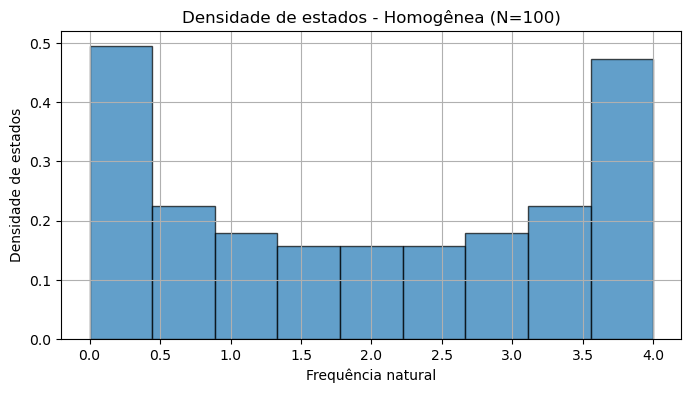

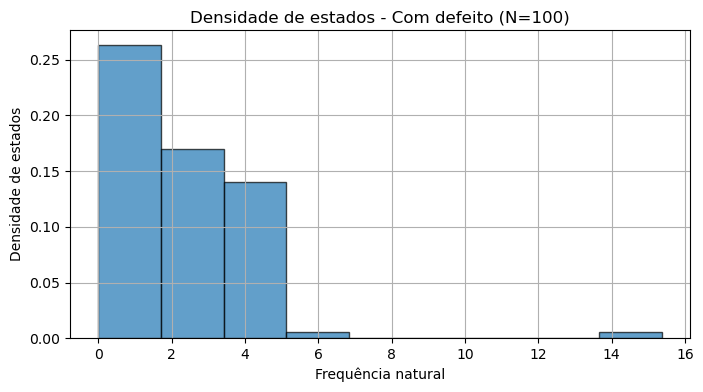

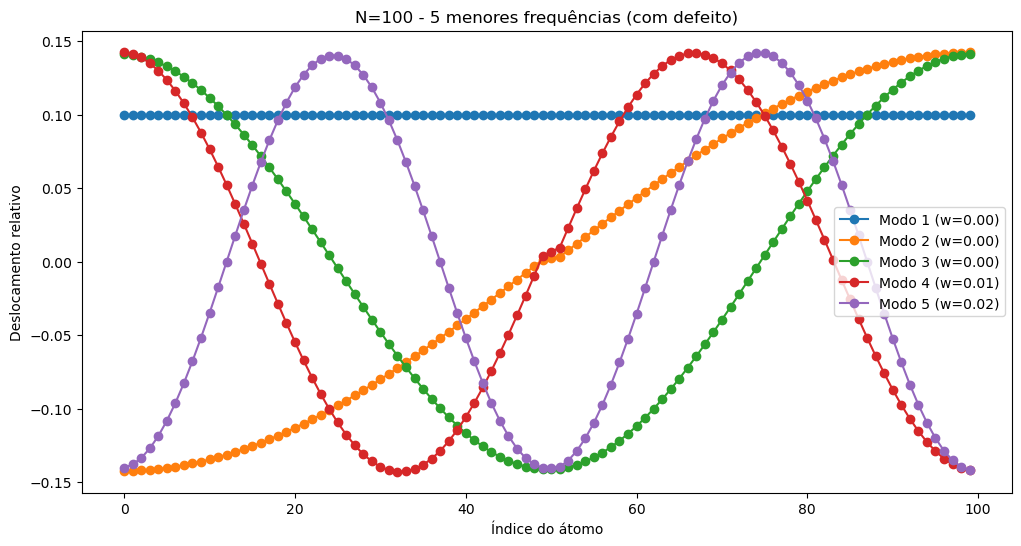

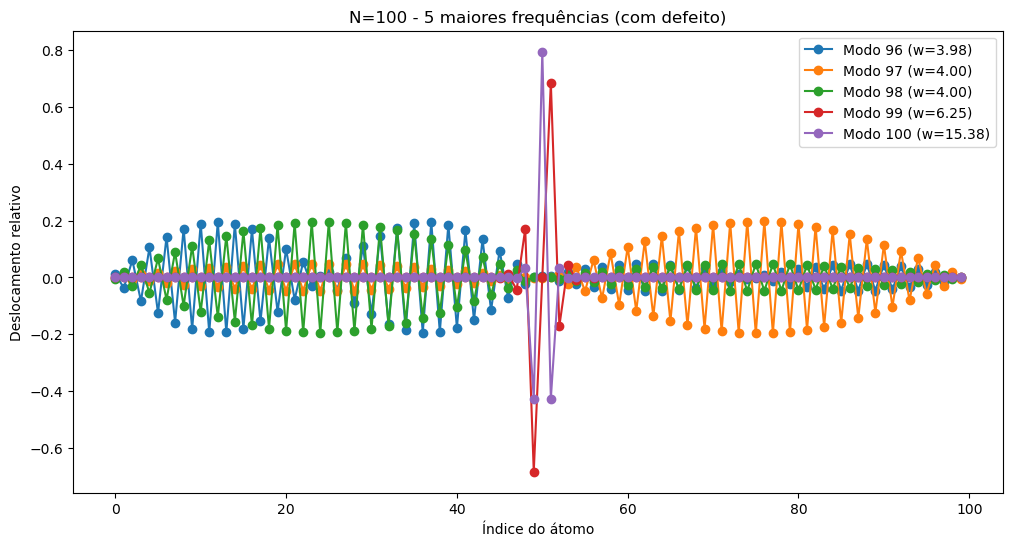


--- N = 1000 ---


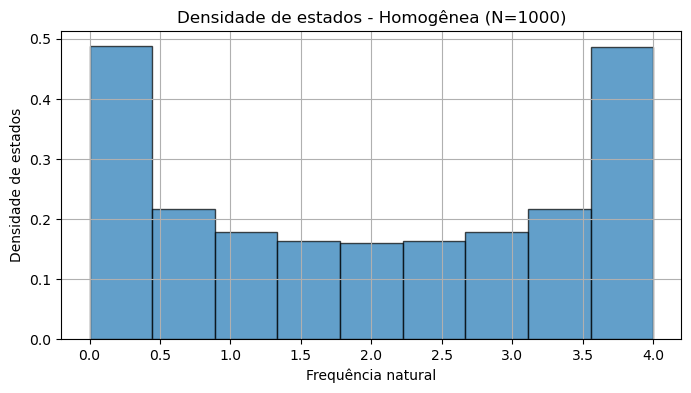

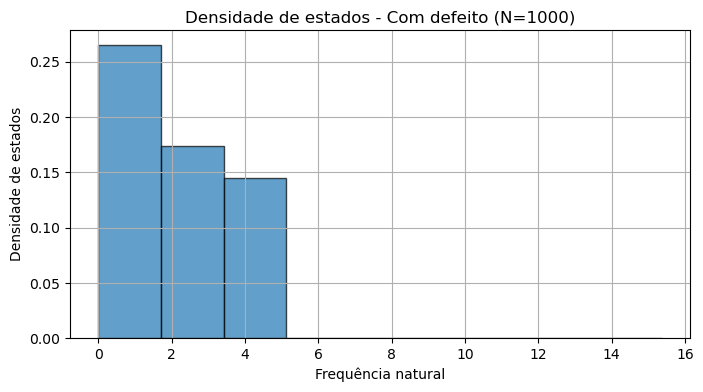

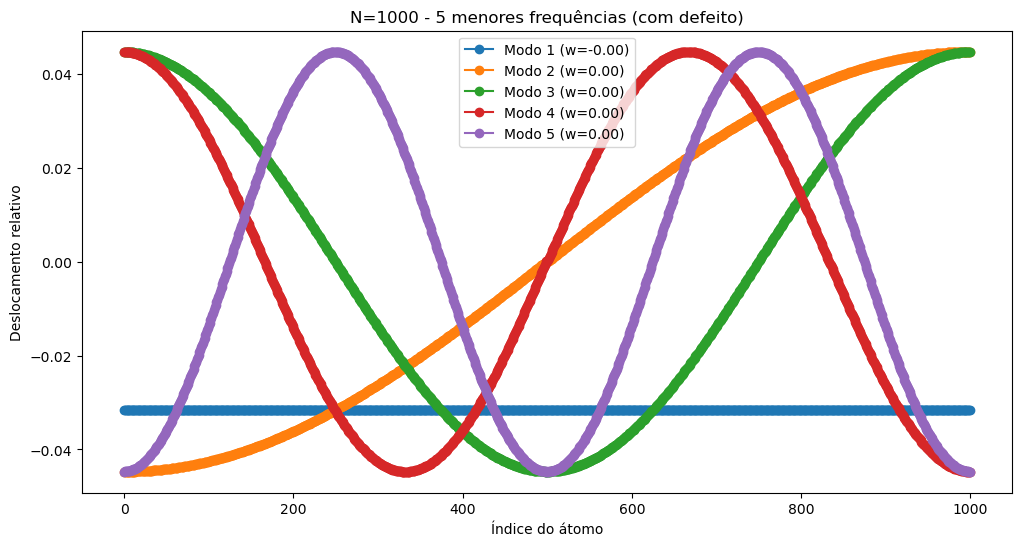

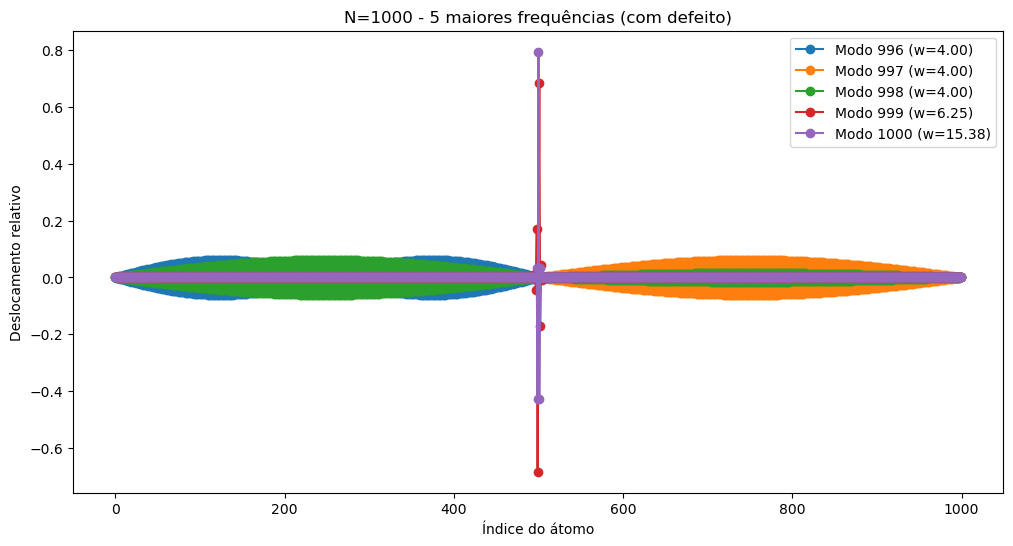


--- N = 10000 ---


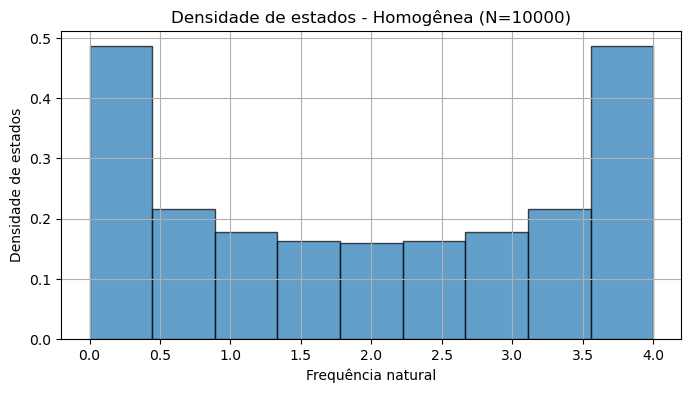

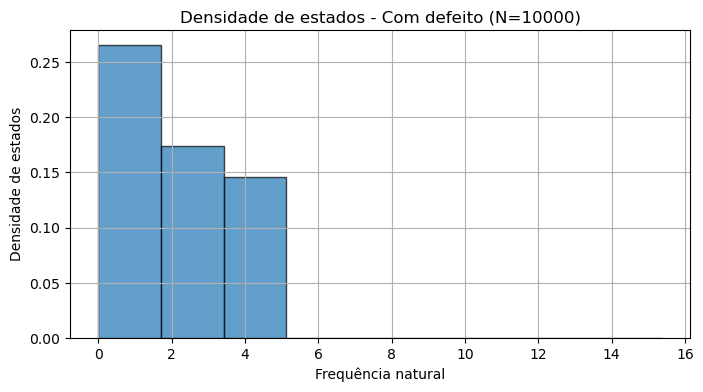

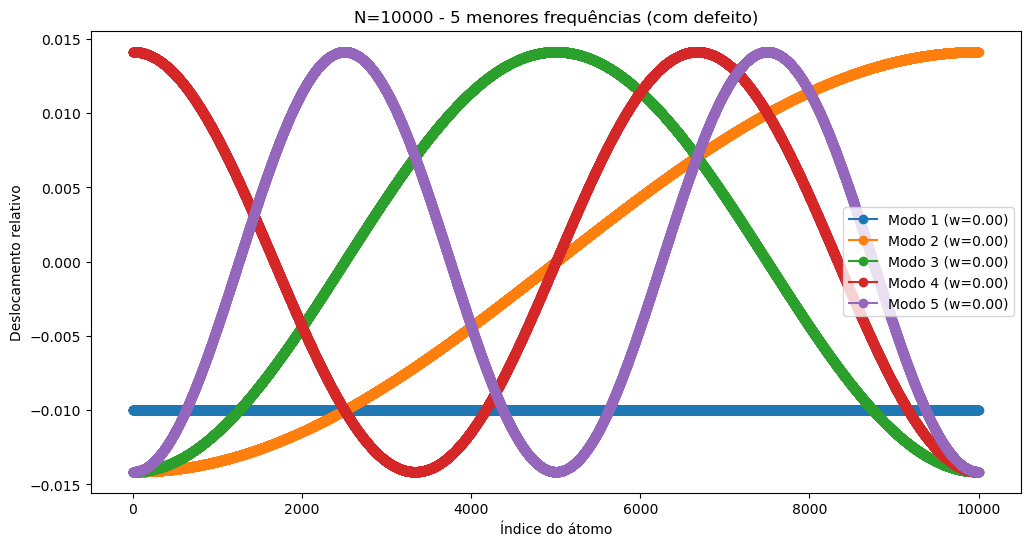

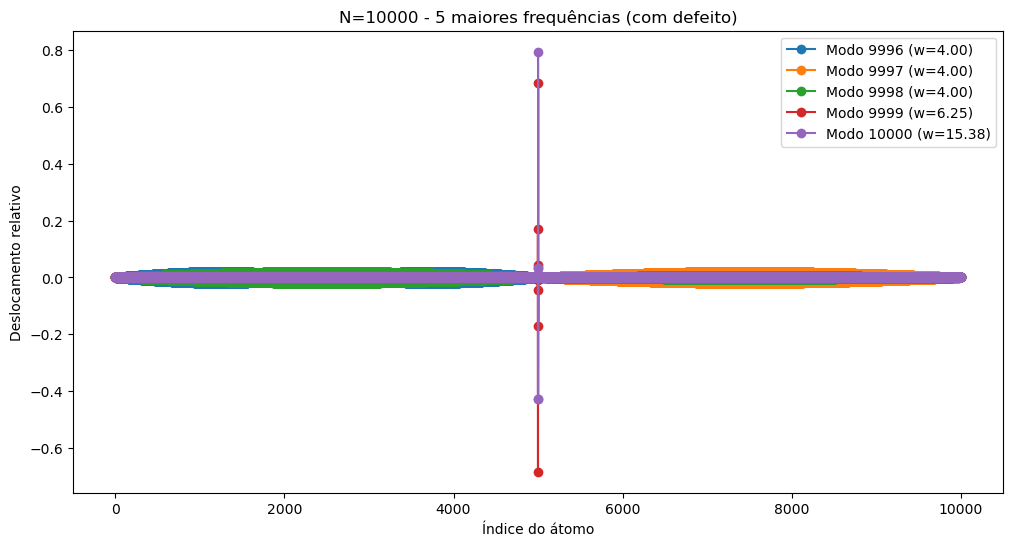

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def montar_matriz_dinamica(N, k=1.0, m=1.0, k2=None):
    """
    Monta a matriz dinâmica para uma cadeia de N massas acopladas por molas.
    Se k2 for fornecido, substitui as duas molas centrais por k2.
    """
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k
            D[i, i-1] -= k
        if i < N-1:
            D[i, i] += k
            D[i, i+1] -= k
    # Defeito de mola no centro, se especificado
    if k2 is not None:
        c = N // 2
        for (a, b) in [(c-1, c), (c, c+1)]:
            D[a, a] += (k2 - k)
            D[a, b] -= (k2 - k)
            D[b, b] += (k2 - k)
            D[b, a] -= (k2 - k)
    return D / m

def calcular_frequencias(D):
    """
    Calcula autovalores (frequências naturais ao quadrado) e autovetores (modos normais).
    """
    w2, modos = np.linalg.eigh(D)
    w = np.sqrt(np.clip(w2, 0, None))
    return w2, modos

def plotar_densidade_de_estados(w2, N, titulo):
    """
    Plota histograma (densidade de estados) das frequências naturais.
    """
    plt.figure(figsize=(8,4))
    plt.hist(w2, bins=9, density=True, alpha=0.7, edgecolor='black')
    plt.xlabel('Frequência natural')
    plt.ylabel('Densidade de estados')
    plt.title(f'Densidade de estados - {titulo} (N={N})')
    plt.grid(True)
    plt.show()

def plotar_modos_normais(modos, w, N, indices, titulo):
    """
    Plota os modos normais para os índices fornecidos.
    """
    x = np.arange(N)
    plt.figure(figsize=(12, 6))
    for idx in indices:
        plt.plot(x, modos[:, idx], marker='o', label=f'Modo {idx+1} (w={w[idx]:.2f})')
    plt.xlabel('Índice do átomo')
    plt.ylabel('Deslocamento relativo')
    plt.title(titulo)
    plt.legend()
    plt.show()

# Parâmetros
m = 1.0
k = 1.0
k2 = 5.0
Ns = [100, 1000, 10000]

for N in Ns:
    print(f"\n--- N = {N} ---")
    # Cadeia homogênea
    D_hom = montar_matriz_dinamica(N, k, m)
    w_hom, modos_hom = calcular_frequencias(D_hom)
    plotar_densidade_de_estados(w_hom, N, 'Homogênea')
    
    # Cadeia com defeito de molas
    D_def = montar_matriz_dinamica(N, k, m, k2=k2)
    w_def, modos_def = calcular_frequencias(D_def)
    plotar_densidade_de_estados(w_def, N, 'Com defeito')
    
    # Modos normais: 5 menores e 5 maiores frequências
    idxs_baixas = np.argsort(w_def)[:5]
    idxs_altas = np.argsort(w_def)[-5:]
    plotar_modos_normais(modos_def, w_def, N, idxs_baixas, f'N={N} - 5 menores frequências (com defeito)')
    plotar_modos_normais(modos_def, w_def, N, idxs_altas, f'N={N} - 5 maiores frequências (com defeito)')


--- N = 100 ---


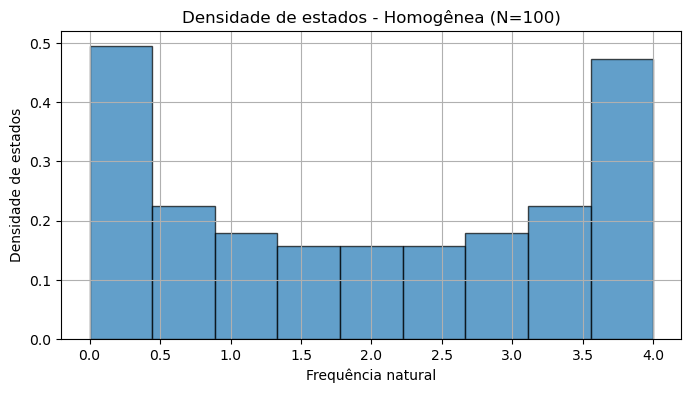

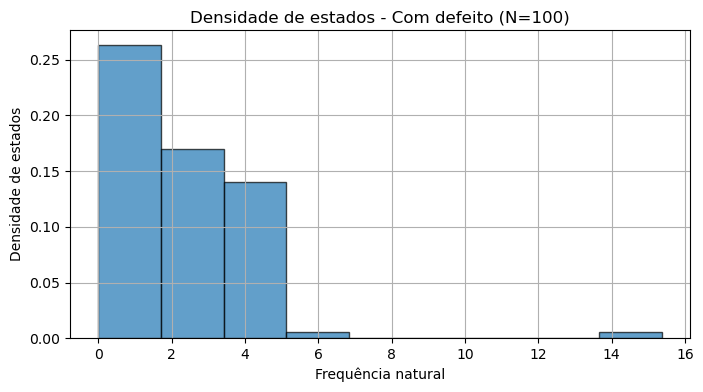


--- N = 1000 ---


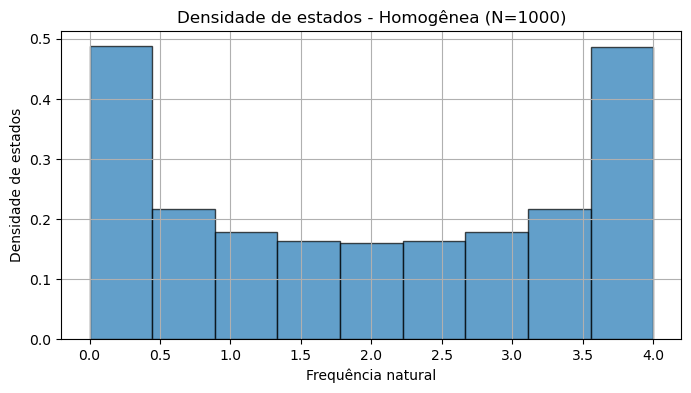

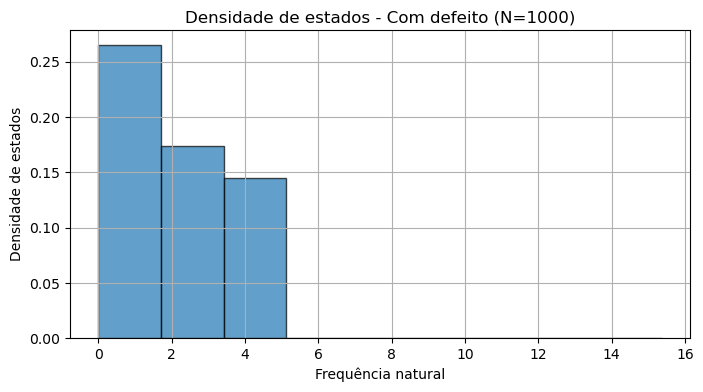


--- N = 10000 ---


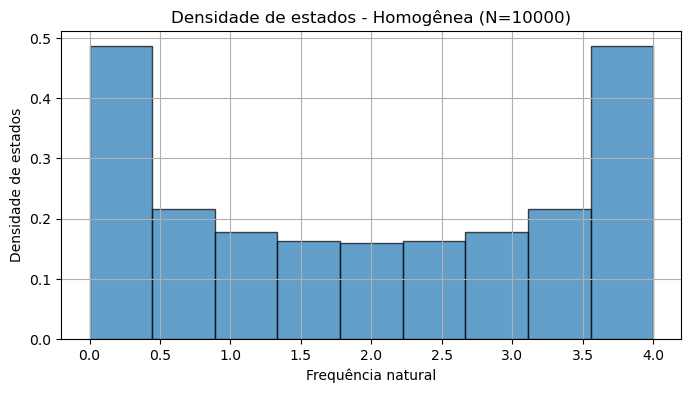

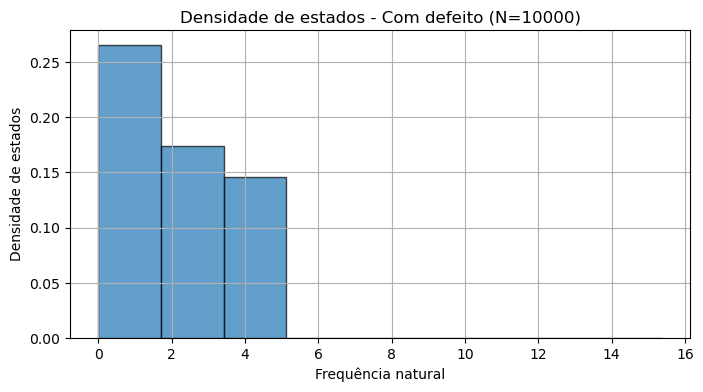

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def montar_matriz_dinamica(N, k=1.0, m=1.0, k2=None):
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k
            D[i, i-1] -= k
        if i < N-1:
            D[i, i] += k
            D[i, i+1] -= k
    # Defeito de mola no centro, se especificado
    if k2 is not None:
        c = N // 2
        for (a, b) in [(c-1, c), (c, c+1)]:
            D[a, a] += (k2 - k)
            D[a, b] -= (k2 - k)
            D[b, b] += (k2 - k)
            D[b, a] -= (k2 - k)
    return D / m

def calcular_frequencias(D):
    w2, modos = np.linalg.eigh(D)
    return w2, modos

def plotar_densidade_de_estados(w2, N, titulo):
    plt.figure(figsize=(8,4))
    plt.hist(w2, bins=9, density=True, alpha=0.7, edgecolor='black')
    plt.xlabel('Frequência natural')
    plt.ylabel('Densidade de estados')
    plt.title(f'Densidade de estados - {titulo} (N={N})')
    plt.grid(True)
    plt.show()

# Parâmetros
m = 1.0
k = 1.0
k2 = 5.0
Ns = [100, 1000, 10000]

for N in Ns:
    print(f"\n--- N = {N} ---")
    # Cadeia homogênea
    D_hom = montar_matriz_dinamica(N, k, m)
    w_hom, modos_hom = calcular_frequencias(D_hom)
    plotar_densidade_de_estados(w_hom, N, 'Homogênea')
    
    # Cadeia com defeito de molas
    D_def = montar_matriz_dinamica(N, k, m, k2=k2)
    w_def, modos_def = calcular_frequencias(D_def)
    plotar_densidade_de_estados(w_def, N, 'Com defeito')